In [154]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

### Load and read the image and audio dataset

In [155]:
Xwr = np.load('x_train_wr.npy')       #loading and reading X_train_wr(image) data with shape
Xwr = Xwr.reshape(60000,28,28)
print(Xwr.shape)

(60000, 28, 28)


In [156]:
Xwr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [157]:
Xwrtest = np.load('x_test_wr.npy')       #loading and reading X_test_wr(image) data with shape
print(Xwrtest.shape)

(10000, 28, 28)


In [158]:
Xsp = np.load('x_train_sp.npy')       #loading and reading X_train_sp(audio) data with shape
print(Xsp.shape)
Xsp

(60000, 507)


array([[0.58781229, 0.40237016, 0.53385287, ..., 0.53096108, 0.53973477,
        0.52661716],
       [0.61764182, 0.47308683, 0.47445779, ..., 0.49119274, 0.50030621,
        0.49722308],
       [0.59793942, 0.43962949, 0.55639131, ..., 0.50279768, 0.54326428,
        0.50583395],
       ...,
       [0.67106666, 0.39061664, 0.48959395, ..., 0.50188884, 0.57272226,
        0.52766092],
       [0.62968866, 0.45268531, 0.43556924, ..., 0.51248913, 0.59172047,
        0.54649432],
       [0.57920444, 0.42566485, 0.50569132, ..., 0.48148231, 0.5335935 ,
        0.4986392 ]])

In [159]:
Xsptest = np.load('x_test_sp.npy')       #loading and reading X_test_sp(audio) data with shape
print(Xsptest.shape)

(10000, 507)


In [160]:
y_train = pd.read_csv('y_train.csv')     #loading and reading labels

y = y_train['label'].values

In [161]:
y.shape

(60000,)

In [162]:
mean = Xwr.mean()
mean

0.1306604838125441

In [163]:
std = Xwr.std()
std

0.30810782171120765

In [164]:
Xwr_norm = (Xwr - mean) / std          #doing normalization on image dataset
m = Xwr_norm.mean()
s = Xwr_norm.std()
print(m)
print(s)

-3.8456010862492325e-16
1.0000000000000007


In [165]:
Xwr_norm

array([[[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389]],

       [[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -

### Visualization of first 10 samples of Image training data with labels distribution

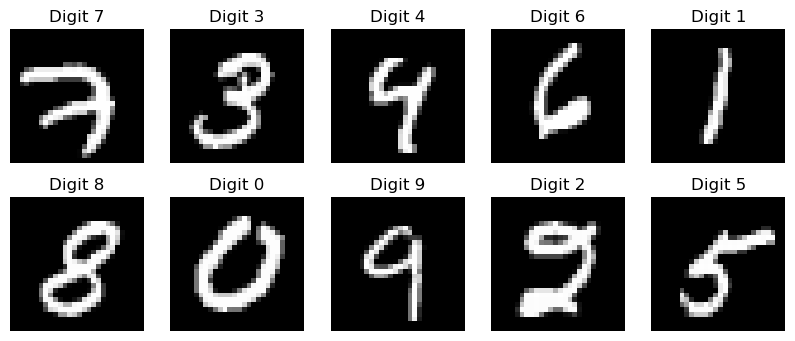

Number of samples for each digit with percentage(%) for original training data:
Digit 0: 5923 samples (9.87%)
Digit 1: 6742 samples (11.24%)
Digit 2: 5958 samples (9.93%)
Digit 3: 6131 samples (10.22%)
Digit 4: 5842 samples (9.74%)
Digit 5: 5421 samples (9.04%)
Digit 6: 5918 samples (9.86%)
Digit 7: 6265 samples (10.44%)
Digit 8: 5851 samples (9.75%)
Digit 9: 5949 samples (9.92%)


In [166]:
Ximg = Xwr
ylab = y

each_digit = {}
samples = {digit: 0 for digit in range(10)}
total = len(Ximg) 

for Ximg, ylab in zip(Ximg, ylab):
    if samples[ylab] == 0:
        each_digit[ylab] = Ximg
    samples[ylab] += 1

#Visualizing each digit from the data
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, (digit, example) in enumerate(each_digit.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(example, cmap='gray')
    ax.set_title(f"Digit {digit}")
    ax.axis('off')
plt.show()

print("Number of samples for each digit with percentage(%) for original training data:")
for digit, count in samples.items():
    percentage = (count / total) * 100
    print(f"Digit {digit}: {count} samples ({percentage:.2f}%)")

In the above figures, we visualize the first 10 samples of the training data and the distribution on all the labels present in the training data. We can clearly see from the number of samples that the data distribution of labels is not balanced. Below shown the count plot of the number of samples corresponding to each digit.

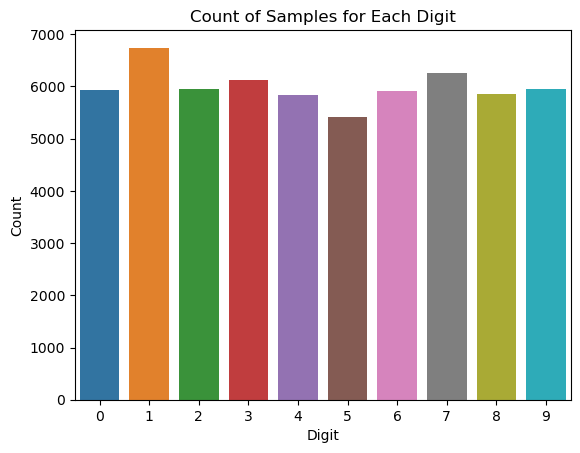

In [167]:
digits = list(samples.keys())
counts = list(samples.values())

#Creating a count plot to visualize the distribution of the digits
sns.barplot(x=digits, y=counts)
plt.title("Count of Samples for Each Digit")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

### Visualization of first 10 samples of Audio training data with labels.

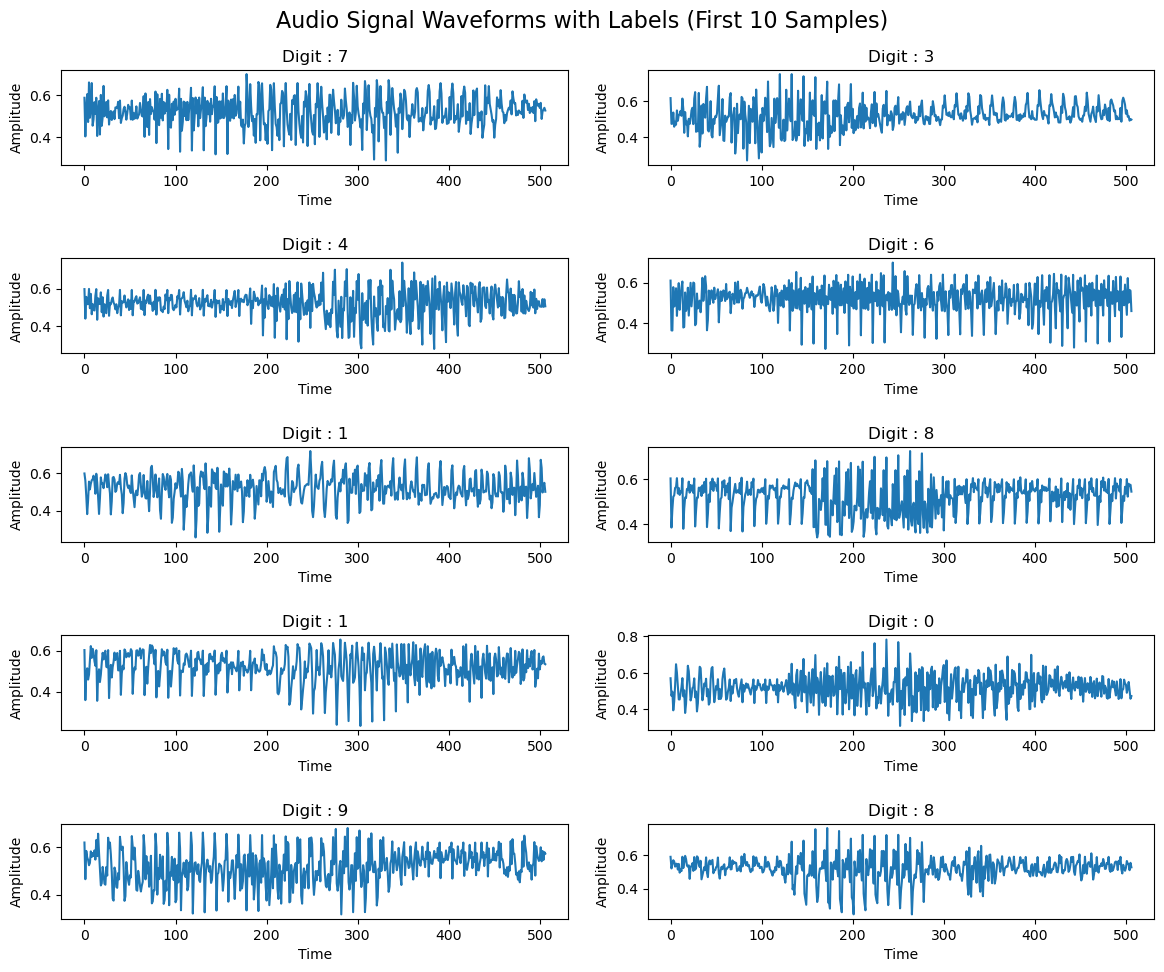

In [168]:
num_samples = 10  
num_cols = 2     
num_rows = (num_samples + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle("Audio Signal Waveforms with Labels (First 10 Samples)", fontsize=16)
axs = axs.flatten()

#Looping through the first 10 samples of audio data
for i in range(num_samples):
    axs[i].plot(Xsp[i])
    axs[i].set_title(f"Digit : {y[i]}") 
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Amplitude")
plt.tight_layout(pad=2)
plt.subplots_adjust(top=0.92)  
plt.show()

In the above figure, we have shown first 10 samples of audio training data in the form of wavelength with their corresponding labels.

In [169]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

def custom_dataloader(X_image, X_audio, y, Ximage_test, Xaudio_test, batch_size=64, val_size=0.2):
    Ximage_train, Ximage_val, Xaudio_train, Xaudio_val, y_train, y_val = train_test_split(X_image, X_audio, y, test_size=val_size, random_state=10)

    Ximg_train_tensor = torch.tensor(Ximage_train, dtype=torch.float32).unsqueeze(1)  
    Xaud_train_tensor = torch.tensor(Xaudio_train, dtype=torch.float32).unsqueeze(1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    
    Ximg_val_tensor = torch.tensor(Ximage_val, dtype=torch.float32).unsqueeze(1)
    Xaud_val_tensor = torch.tensor(Xaudio_val, dtype=torch.float32).unsqueeze(1)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    
    Ximg_test_tensor = torch.tensor(Ximage_test, dtype=torch.float32).unsqueeze(1)
    Xaud_test_tensor = torch.tensor(Xaudio_test, dtype=torch.float32).unsqueeze(1)
    
    # Create datasets and dataloaders
    train_dataset = TensorDataset(Ximg_train_tensor, Xaud_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(Ximg_val_tensor, Xaud_val_tensor, y_val_tensor)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_dataset = TensorDataset(Ximg_test_tensor, Xaud_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [170]:
train_loader, val_loader, test_loader = custom_dataloader(Xwr, Xsp, y, Xwrtest, Xsptest, batch_size=64, val_size=0.2)

In [171]:
train_loader
val_loader
test_loader

We have created a custom dataloader, in which we are first splitting our training data into training and validation with a 80-20 split to perform validation. We have converted the numpy arrays of image, audio and labels into tensor data and then we have created a dataloader for trian, test and validation. The train_loader has three type of data - image train data, audio train data and labels and it is similar for validation data also. For test data we have only two type of values image test, audio test because we have to predict the labels here.

## Model Design

### CNN2_Custom (CNN with two convolutional layers)

In [172]:
class CNN2_Custom(nn.Module):
    def __init__(self, conv1_parameter, conv2_parameter, dropout_rate):
        super(CNN2_Custom, self).__init__()
        conv1_kernel_size, conv1_stride, conv1_padding = conv1_parameter
        conv2_kernel_size, conv2_stride, conv2_padding = conv2_parameter        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=conv1_kernel_size, stride=conv1_stride, padding=conv1_padding)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=conv2_kernel_size, stride=conv2_stride, padding=conv2_padding)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)      
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return x

In the above code we have created a CNNCustom model with 2 convolutional layers followed by a max pool layer, one fully connected dense layer and a dropout layer. We can select custom values for kernel size, stride and padding and dropout rate as shown below. We used Relu as an activation fuction.

In [173]:
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.25

CNN2_model = CNN2_Custom(conv1_parameter, conv2_parameter, dropout_rate)

In [174]:
img_embed = []

for img in train_loader:
    images = img[0] 
    with torch.no_grad():
        outputs = CNN2_model(images)
    img_embed.append(outputs)
img_embed = torch.cat(img_embed, dim=0)

In [175]:
type(outputs)

torch.Tensor

In [176]:
print("Embeddings shape:", img_embed.shape)

Embeddings shape: torch.Size([48000, 128])


### CNN3_Custom (CNN with three convolutional layers)

In [177]:
class CNN3_Custom(nn.Module):
    def __init__(self, conv1_parameter, conv2_parameter, conv3_parameter, dropout_rate):
        super(CNN3_Custom, self).__init__()
        conv1_kernel_size, conv1_stride, conv1_padding = conv1_parameter
        conv2_kernel_size, conv2_stride, conv2_padding = conv2_parameter
        conv3_kernel_size, conv3_stride, conv3_padding = conv3_parameter
        self.conv1 = nn.Conv2d(1, 32, kernel_size=conv1_kernel_size, stride=conv1_stride, padding=conv1_padding)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=conv2_kernel_size, stride=conv2_stride, padding=conv2_padding)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=conv3_kernel_size, stride=conv3_stride, padding=conv3_padding)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)        
        self.fc1 = nn.Linear(128 * 3 * 3, 128)     
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return x

In the above code we have created a CNN3Custom model with 3 convolutional layers followed by a max pool layer, one fully connected dense layer and a dropout layer. We can select custom values for kernel size, stride and padding and dropout rate as shown below. We used Relu as an activation fuction.

In [178]:
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv3_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.5

CNN3_model = CNN3_Custom(conv1_parameter, conv2_parameter, conv3_parameter, dropout_rate)

In [179]:
img_embed = []

for img in train_loader:
    images = img[0] 
    with torch.no_grad():
        outputs = CNN3_model(images)
    img_embed.append(outputs)
img_embed = torch.cat(img_embed, dim=0)

In [180]:
print("Embeddings shape:", img_embed.shape)

Embeddings shape: torch.Size([48000, 128])


### Audio_Custom (CNN with 1 convolutional layer)

In [181]:
class Audio_Custom(nn.Module):
    def __init__(self):
        super(Audio_Custom, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=1, padding=2) 
        self.pool = nn.MaxPool1d(2, 2)  
        self.fc1 = nn.Linear(16 * 253, 256)  
        self.fc2 = nn.Linear(256, 128) 
        
    def forward(self, x):
        x = x.view(x.size(0), 1, 507)  
        x = self.pool(F.relu(self.conv1(x)))  
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))          
        return x

In the above code we have created a AudioCustom model with 1 convolutional layers followed by a max pool layer, two fully connected dense layer. We have already selected the in channel, out channel, kernel size, stride and padding for this model. We used Relu as an activation fuction.

In [182]:
Audio_model = Audio_Custom()

In [183]:
audio_embed = []

for aud in train_loader:
    audio = aud[1] 
    with torch.no_grad():
        outputs = Audio_model(audio)
    audio_embed.append(outputs)
audio_embed = torch.cat(audio_embed, dim=0)

In [184]:
type(outputs)

torch.Tensor

In [185]:
print("Embeddings shape:", audio_embed.shape)

Embeddings shape: torch.Size([48000, 128])


### Fusion Model (Img_Aud_Model)

In [186]:
class Img_Aud_Model(nn.Module):
    def __init__(self, image_model, audio_model):
        super(Img_Aud_Model, self).__init__()
        self.image_model = image_model
        self.audio_model = audio_model
        self.fc = nn.Linear(128 + 128, 10)  #Concatenating the output sizes of the image and audio models
        
    def forward(self, x1, x2):
        x1_output = self.image_model(x1)
        x2_output = self.audio_model(x2)
        x = torch.cat((x1_output, x2_output), dim=1)  #Concatenating the outputs from both modals
        x = self.fc(x)
        return x1_output, x2_output, x

In the above fusion model, we are concatenating the outputs of image and audio models and then pass them through a fully connected dense layer to get the final output, image embeddings and audio embeddings.

## Model Training and Hyperparameter tuning

### Fusion Model 1 (Combination 1) - CNN2_Custom + Audio_Custom with dropout rate = 0.2 

In [187]:
#Instantiate the image and audio models
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.20

Img_model1 = CNN2_Custom(conv1_parameter, conv2_parameter, dropout_rate) #image model for 2 layers
audio_model = Audio_Custom()  #Audio model

IMG_AUD_model1 = Img_Aud_Model(Img_model1, audio_model) #Fusion of Img and Aud model

In [188]:
#Selecting the loss function and optimizer with learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(IMG_AUD_model1.parameters(), lr=0.001)

print("For Learning Rate = 0.001")
print()

bestf1_score = 0.0
best_epoch = 0
train_acc_11 = []
val_acc_11 = []

num_epochs = 10 
for epoch in range(num_epochs):
    IMG_AUD_model1.train()  #training step
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for input_img, input_aud, labels in train_loader:
        optimizer.zero_grad()
        _, _, outputs = IMG_AUD_model1(input_img, input_aud)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
        _, pred_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (pred_train == labels).sum().item()
    
    train_accuracy = correct_train / total_train
    train_acc_11.append(train_accuracy)  
    
    #Validation step
    IMG_AUD_model1.eval()
    correct_val = 0
    total_val = 0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for input_img_val, input_aud_val, labels_val in val_loader:
            _, _, outputs_val = IMG_AUD_model1(input_img_val, input_aud_val)
            _, pred_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (pred_val == labels_val).sum().item()
            all_labels.extend(labels_val.numpy())
            all_preds.extend(pred_val.numpy())
    
    val_accuracy = correct_val / total_val
    val_acc_11.append(val_accuracy)    
    valf1_score = f1_score(all_labels, all_preds, average='weighted')    
    if valf1_score > bestf1_score:
        bestf1_score = valf1_score
        best_epoch = epoch
        torch.save(IMG_AUD_model1.state_dict(), 'best_model1.pth')  #Saving the best model
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Epoch Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {valf1_score:.4f}')

print()
print(f'Best validation F1 score: {bestf1_score:.4f} at epoch {best_epoch+1}')

For Learning Rate = 0.001

Epoch 1/10, Epoch Loss: 0.2018, Training Accuracy: 0.9365, Validation Accuracy: 0.9839, Validation F1 Score: 0.9839
Epoch 2/10, Epoch Loss: 0.0413, Training Accuracy: 0.9870, Validation Accuracy: 0.9909, Validation F1 Score: 0.9909
Epoch 3/10, Epoch Loss: 0.0241, Training Accuracy: 0.9925, Validation Accuracy: 0.9911, Validation F1 Score: 0.9911
Epoch 4/10, Epoch Loss: 0.0171, Training Accuracy: 0.9944, Validation Accuracy: 0.9938, Validation F1 Score: 0.9937
Epoch 5/10, Epoch Loss: 0.0131, Training Accuracy: 0.9959, Validation Accuracy: 0.9933, Validation F1 Score: 0.9933
Epoch 6/10, Epoch Loss: 0.0088, Training Accuracy: 0.9971, Validation Accuracy: 0.9938, Validation F1 Score: 0.9938
Epoch 7/10, Epoch Loss: 0.0086, Training Accuracy: 0.9972, Validation Accuracy: 0.9942, Validation F1 Score: 0.9942
Epoch 8/10, Epoch Loss: 0.0079, Training Accuracy: 0.9973, Validation Accuracy: 0.9910, Validation F1 Score: 0.9910
Epoch 9/10, Epoch Loss: 0.0056, Training Accu

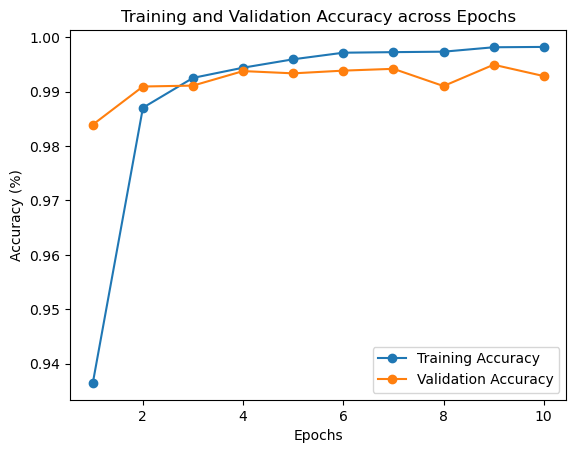

In [225]:
# Plot training and validation accuracy across epochs
plt.plot(range(1, num_epochs + 1), train_acc_11, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_acc_11, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy across Epochs')
plt.legend()
plt.show()

### Fusion Model 1 (Combination 2 ) - CNN2_Custom + Audio_Custom with dropout rate = 0.5

In [190]:
# Instantiate the visual and audio models
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.5

Img_model2 = CNN2_Custom(conv1_parameter, conv2_parameter, dropout_rate) #image model with 2 layers
audio_model = Audio_Custom()          #Audio model

IMG_AUD_model2 = Img_Aud_Model(Img_model2, audio_model) #Fusion of Img and Aud model

In [191]:
#Selecting the loss function and optimizer with learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(IMG_AUD_model2.parameters(), lr=0.001)

print("For Learning Rate = 0.001")
print()

bestf1_score = 0.0
best_epoch = 0
train_acc_12 = []
val_acc_12 = []

num_epochs = 10  
for epoch in range(num_epochs):
    IMG_AUD_model2.train()  #training step
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for input_img, input_aud, labels in train_loader:
        optimizer.zero_grad()
        _, _, outputs = IMG_AUD_model2(input_img, input_aud)  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
        _, pred_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (pred_train == labels).sum().item()
    
    train_accuracy = correct_train / total_train
    train_acc_12.append(train_accuracy)  
    
    #Validation step
    IMG_AUD_model2.eval()
    correct_val = 0
    total_val = 0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for input_img_val, input_aud_val, labels_val in val_loader:
            _, _, outputs_val = IMG_AUD_model2(input_img_val, input_aud_val)
            _, pred_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (pred_val == labels_val).sum().item()
            all_labels.extend(labels_val.numpy())
            all_preds.extend(pred_val.numpy())
    
    val_accuracy = correct_val / total_val
    val_acc_12.append(val_accuracy)    
    valf1_score = f1_score(all_labels, all_preds, average='weighted')    
    if valf1_score > bestf1_score:
        bestf1_score = valf1_score
        best_epoch = epoch
        torch.save(IMG_AUD_model2.state_dict(), 'best_model2.pth')  #Saving the best model
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Epoch Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {valf1_score:.4f}')

print()
print(f'Best validation F1 score: {bestf1_score:.4f} at epoch {best_epoch+1}')

For Learning Rate = 0.001

Epoch 1/10, Epoch Loss: 0.2579, Training Accuracy: 0.9199, Validation Accuracy: 0.9838, Validation F1 Score: 0.9837
Epoch 2/10, Epoch Loss: 0.0669, Training Accuracy: 0.9795, Validation Accuracy: 0.9913, Validation F1 Score: 0.9913
Epoch 3/10, Epoch Loss: 0.0407, Training Accuracy: 0.9873, Validation Accuracy: 0.9929, Validation F1 Score: 0.9929
Epoch 4/10, Epoch Loss: 0.0288, Training Accuracy: 0.9910, Validation Accuracy: 0.9924, Validation F1 Score: 0.9924
Epoch 5/10, Epoch Loss: 0.0226, Training Accuracy: 0.9925, Validation Accuracy: 0.9933, Validation F1 Score: 0.9933
Epoch 6/10, Epoch Loss: 0.0172, Training Accuracy: 0.9944, Validation Accuracy: 0.9932, Validation F1 Score: 0.9932
Epoch 7/10, Epoch Loss: 0.0152, Training Accuracy: 0.9951, Validation Accuracy: 0.9951, Validation F1 Score: 0.9951
Epoch 8/10, Epoch Loss: 0.0119, Training Accuracy: 0.9961, Validation Accuracy: 0.9946, Validation F1 Score: 0.9946
Epoch 9/10, Epoch Loss: 0.0097, Training Accu

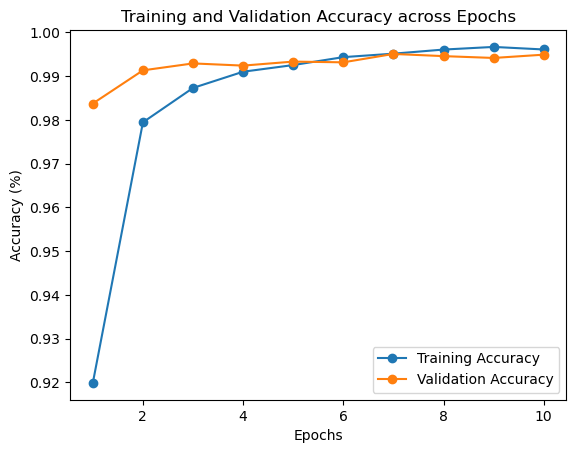

In [224]:
# Plot training and validation accuracy across epochs
plt.plot(range(1, num_epochs + 1), train_acc_12, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_acc_12, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy across Epochs')
plt.legend()
plt.show()

### Fusion Model 2 (Combination 1) - CNN3_Custom + Audio_Custom with dropout rate = 0.2 

In [193]:
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv3_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.20

Img_model3 = CNN3_Custom(conv1_parameter, conv2_parameter, conv3_parameter, dropout_rate) #image model with 3 layers
audio_model = Audio_Custom()          #Audio model

IMG_AUD_model3 = Img_Aud_Model(Img_model3, audio_model)   #Fusion of Img and Aud model

In [194]:
#Selecting the loss function and optimizer with learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(IMG_AUD_model3.parameters(), lr=0.001)

print("For Learning Rate = 0.001")
print()

bestf1_score = 0.0
best_epoch = 0
train_acc_21 = []
val_acc_21 = []

num_epochs = 10  
for epoch in range(num_epochs):
    IMG_AUD_model3.train()  #training steps
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for input_img, input_aud, labels in train_loader:
        optimizer.zero_grad()
        _, _, outputs = IMG_AUD_model3(input_img, input_aud)  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
        _, pred_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (pred_train == labels).sum().item()
    
    train_accuracy = correct_train / total_train
    train_acc_21.append(train_accuracy)  
    
    #Validation step
    IMG_AUD_model3.eval()
    correct_val = 0
    total_val = 0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for input_img_val, input_aud_val, labels_val in val_loader:
            _, _, outputs_val = IMG_AUD_model3(input_img_val, input_aud_val)
            _, pred_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (pred_val == labels_val).sum().item()
            all_labels.extend(labels_val.numpy())
            all_preds.extend(pred_val.numpy())
    
    val_accuracy = correct_val / total_val
    val_acc_21.append(val_accuracy)    
    valf1_score = f1_score(all_labels, all_preds, average='weighted')    
    if valf1_score > bestf1_score:
        bestf1_score = valf1_score
        best_epoch = epoch
        torch.save(IMG_AUD_model3.state_dict(), 'best_model3.pth')  #Saving the best model
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Epoch Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {valf1_score:.4f}')

print()
print(f'Best validation F1 score: {bestf1_score:.4f} at epoch {best_epoch+1}')

For Learning Rate = 0.001

Epoch 1/10, Epoch Loss: 0.1289, Training Accuracy: 0.9594, Validation Accuracy: 0.9888, Validation F1 Score: 0.9888
Epoch 2/10, Epoch Loss: 0.0217, Training Accuracy: 0.9928, Validation Accuracy: 0.9924, Validation F1 Score: 0.9924
Epoch 3/10, Epoch Loss: 0.0138, Training Accuracy: 0.9954, Validation Accuracy: 0.9930, Validation F1 Score: 0.9930
Epoch 4/10, Epoch Loss: 0.0080, Training Accuracy: 0.9975, Validation Accuracy: 0.9918, Validation F1 Score: 0.9918
Epoch 5/10, Epoch Loss: 0.0078, Training Accuracy: 0.9977, Validation Accuracy: 0.9942, Validation F1 Score: 0.9942
Epoch 6/10, Epoch Loss: 0.0051, Training Accuracy: 0.9985, Validation Accuracy: 0.9944, Validation F1 Score: 0.9944
Epoch 7/10, Epoch Loss: 0.0067, Training Accuracy: 0.9979, Validation Accuracy: 0.9941, Validation F1 Score: 0.9941
Epoch 8/10, Epoch Loss: 0.0051, Training Accuracy: 0.9984, Validation Accuracy: 0.9955, Validation F1 Score: 0.9955
Epoch 9/10, Epoch Loss: 0.0048, Training Accu

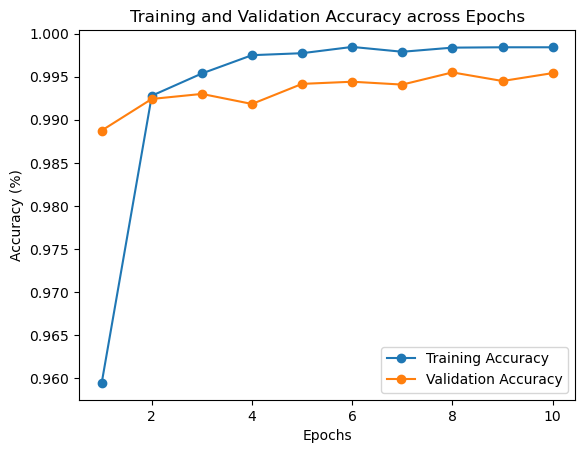

In [223]:
# Plot training and validation accuracy across epochs
plt.plot(range(1, num_epochs + 1), train_acc_21, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_acc_21, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy across Epochs')
plt.legend()
plt.show()

### Fusion Model 2 (Combination 2) - CNN3_Custom + Audio_Custom with dropout rate = 0.5 

In [196]:
conv1_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv2_parameter = (5, 1, 2)  #kernel_size, stride, padding
conv3_parameter = (5, 1, 2)  #kernel_size, stride, padding
dropout_rate = 0.5

Img_model4 = CNN3_Custom(conv1_parameter, conv2_parameter, conv3_parameter, dropout_rate) #image model with 3 layers
audio_model = Audio_Custom()          #Audio model

IMG_AUD_model4 = Img_Aud_Model(Img_model4, audio_model)  #Fusion of Img and Aud model

In [197]:
#Selecting the loss function and optimizer with learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(IMG_AUD_model4.parameters(), lr=0.001)

print("For Learning Rate = 0.001")
print()

bestf1_score = 0.0
best_epoch = 0
train_acc_22 = []
val_acc_22 = []

num_epochs = 10  
for epoch in range(num_epochs):
    IMG_AUD_model4.train() #training steps
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for input_img, input_aud, labels in train_loader:
        optimizer.zero_grad()
        _, _, outputs = IMG_AUD_model4(input_img, input_aud)  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
        _, pred_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (pred_train == labels).sum().item()
    
    train_accuracy = correct_train / total_train
    train_acc_22.append(train_accuracy)  
    
    #Validation step
    IMG_AUD_model4.eval()
    correct_val = 0
    total_val = 0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for input_img_val, input_aud_val, labels_val in val_loader:
            _, _, outputs_val = IMG_AUD_model4(input_img_val, input_aud_val)
            _, pred_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (pred_val == labels_val).sum().item()
            all_labels.extend(labels_val.numpy())
            all_preds.extend(pred_val.numpy())
    
    val_accuracy = correct_val / total_val
    val_acc_22.append(val_accuracy)    
    valf1_score = f1_score(all_labels, all_preds, average='weighted')    
    if valf1_score > bestf1_score:
        bestf1_score = valf1_score
        best_epoch = epoch
        torch.save(IMG_AUD_model4.state_dict(), 'best_model4.pth')  #Saving the best model
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Epoch Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {valf1_score:.4f}')

print()
print(f'Best validation F1 score: {bestf1_score:.4f} at epoch {best_epoch+1}')

For Learning Rate = 0.001

Epoch 1/10, Epoch Loss: 0.1423, Training Accuracy: 0.9557, Validation Accuracy: 0.9902, Validation F1 Score: 0.9902
Epoch 2/10, Epoch Loss: 0.0213, Training Accuracy: 0.9933, Validation Accuracy: 0.9936, Validation F1 Score: 0.9936
Epoch 3/10, Epoch Loss: 0.0129, Training Accuracy: 0.9960, Validation Accuracy: 0.9945, Validation F1 Score: 0.9945
Epoch 4/10, Epoch Loss: 0.0113, Training Accuracy: 0.9962, Validation Accuracy: 0.9944, Validation F1 Score: 0.9944
Epoch 5/10, Epoch Loss: 0.0086, Training Accuracy: 0.9974, Validation Accuracy: 0.9944, Validation F1 Score: 0.9944
Epoch 6/10, Epoch Loss: 0.0077, Training Accuracy: 0.9978, Validation Accuracy: 0.9952, Validation F1 Score: 0.9952
Epoch 7/10, Epoch Loss: 0.0068, Training Accuracy: 0.9977, Validation Accuracy: 0.9956, Validation F1 Score: 0.9956
Epoch 8/10, Epoch Loss: 0.0054, Training Accuracy: 0.9981, Validation Accuracy: 0.9959, Validation F1 Score: 0.9959
Epoch 9/10, Epoch Loss: 0.0051, Training Accu

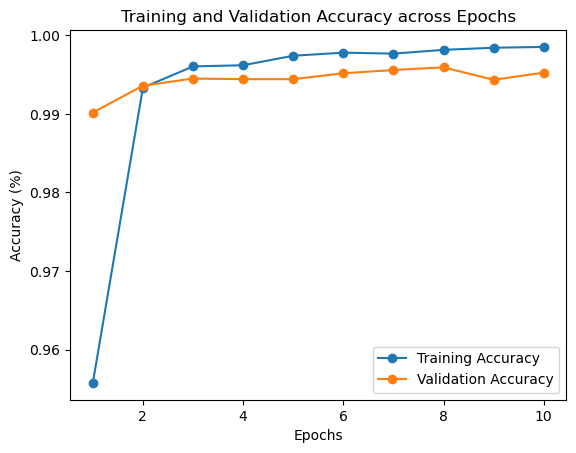

In [212]:
# Plot training and validation accuracy across epochs
plt.plot(range(1, num_epochs + 1), train_acc_22, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_acc_22, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy across Epochs')
plt.legend()
plt.show()

## Image and audio embeddings from Best trained model - Fusion Model 2 (Combination 2)

Now based on the training data we are getting the image and audio embeddings for the best performing model and later on we will use this embeddings for t-SNE and kmeans.

In [213]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(IMG_AUD_model4.parameters(), lr=0.001)

IMG_AUD_model4 = Img_Aud_Model(Img_model4, audio_model)
IMG_AUD_model4.load_state_dict(torch.load('best_model4.pth'))

IMG_AUD_model4.train() 
running_loss = 0.0
image = []
audio = []
label = []

for inputs_visual, inputs_audio, labels in train_loader:
    optimizer.zero_grad() 
    img_outputs, aud_outputs, outputs = IMG_AUD_model4(inputs_visual, inputs_audio)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()       
    running_loss += loss.item()

    image.append(img_outputs.detach().numpy())
    audio.append(aud_outputs.detach().numpy())
    label.append(labels.numpy())

image_embedding = np.concatenate(image, axis=0)
audio_embedding = np.concatenate(audio, axis=0)
labels = np.concatenate(label, axis=0)   

In [214]:
print(len(image_embedding))
print(len(audio_embedding))
print(len(labels))

48000
48000
48000


In [215]:
print(image_embedding[0].shape)
print(audio_embedding[0].shape)

(128,)
(128,)


In [216]:
image_embedding

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , 18.847271 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  4.364585 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  6.7485633,  4.1695013, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ..., 16.36113  , 22.457592 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [217]:
audio_embedding

array([[ 0.7711792 ,  2.5419888 ,  2.7676737 , ...,  2.2367895 ,
         0.        ,  0.        ],
       [ 2.3089728 ,  3.0710723 ,  0.        , ...,  0.        ,
         3.551786  , 10.678391  ],
       [ 1.0355592 ,  0.        ,  0.63426334, ...,  0.3113952 ,
         0.        ,  0.0651073 ],
       ...,
       [ 0.2563538 ,  0.1425784 ,  2.1412454 , ...,  0.41136652,
         0.25974196,  0.06363471],
       [ 0.        ,  4.0322347 ,  0.        , ...,  0.        ,
         2.0351584 ,  0.52076447],
       [ 0.        ,  3.1252213 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [218]:
labels

array([7, 3, 9, ..., 9, 2, 1], dtype=int64)

## (Inference) Test Data predictions on Best Model - Fusion Model 2 (Combination 2)

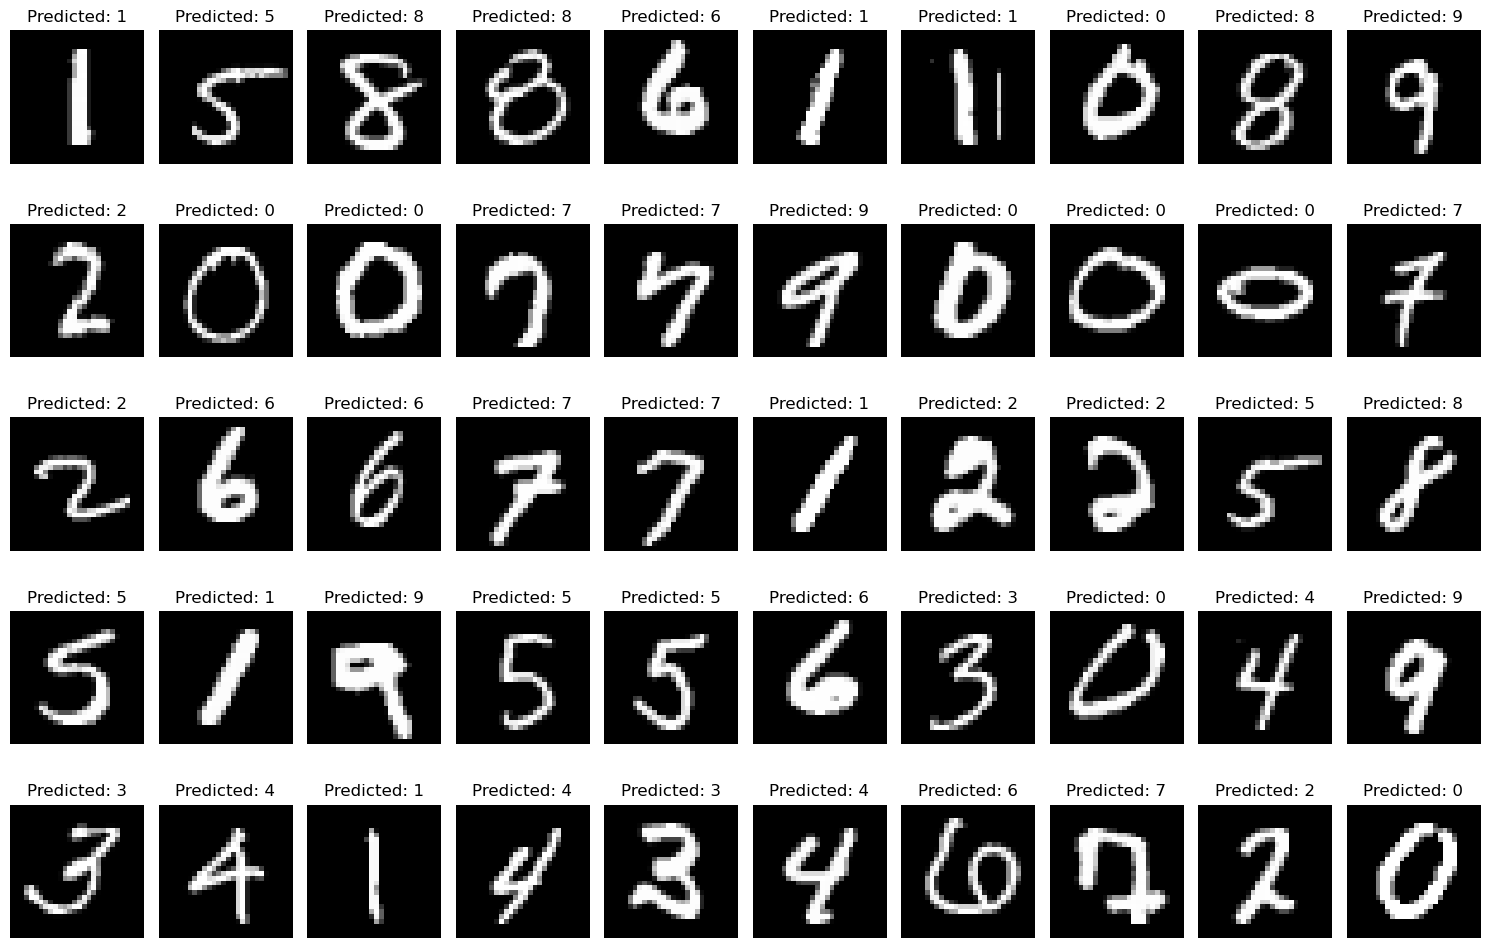

In [219]:
IMG_AUD_model4.eval()  #evaluation based on best model
test_preds = []

with torch.no_grad():
    for inputs_image_test, inputs_audio_test in test_loader:
        _,_,outputs_test = IMG_AUD_model4(inputs_image_test, inputs_audio_test)
        _, pred_test = torch.max(outputs_test.data, 1)
        test_preds.extend(pred_test.numpy())
        
fig, axs = plt.subplots(5, 10, figsize=(15, 10))
for i in range(50):
    image = Xwrtest[i]  
    label = test_preds[i]  
    row = i % 5
    col = i // 5
    ax = axs[row, col]  
    ax.imshow(image, cmap='gray')  
    ax.set_title(f'Predicted: {label}')  
    ax.axis('off')  
plt.tight_layout() 
plt.show() 

The above figure shows the first 50 samples fo test data and their predicted labels based on the best trained model

In [220]:
test_preds

[1,
 2,
 2,
 5,
 3,
 5,
 0,
 6,
 1,
 4,
 8,
 0,
 6,
 9,
 1,
 8,
 7,
 7,
 5,
 4,
 6,
 7,
 7,
 5,
 3,
 1,
 9,
 1,
 6,
 4,
 1,
 0,
 2,
 3,
 6,
 0,
 0,
 2,
 0,
 7,
 8,
 0,
 5,
 4,
 2,
 9,
 7,
 8,
 9,
 0,
 3,
 0,
 9,
 8,
 6,
 2,
 1,
 1,
 5,
 1,
 6,
 9,
 8,
 5,
 9,
 4,
 0,
 1,
 4,
 4,
 5,
 5,
 6,
 3,
 3,
 3,
 3,
 6,
 4,
 2,
 2,
 9,
 7,
 2,
 6,
 3,
 6,
 9,
 8,
 6,
 5,
 0,
 2,
 0,
 1,
 9,
 9,
 5,
 9,
 8,
 9,
 2,
 4,
 9,
 5,
 9,
 6,
 2,
 3,
 2,
 6,
 3,
 6,
 6,
 2,
 5,
 1,
 4,
 1,
 5,
 6,
 4,
 3,
 5,
 2,
 1,
 9,
 4,
 3,
 7,
 1,
 2,
 1,
 2,
 3,
 3,
 9,
 9,
 7,
 7,
 2,
 6,
 7,
 3,
 0,
 6,
 9,
 8,
 1,
 0,
 9,
 8,
 4,
 4,
 8,
 7,
 2,
 6,
 3,
 7,
 5,
 0,
 5,
 3,
 0,
 5,
 0,
 2,
 5,
 3,
 5,
 1,
 5,
 4,
 2,
 2,
 6,
 2,
 6,
 0,
 2,
 7,
 9,
 5,
 1,
 2,
 8,
 4,
 3,
 5,
 3,
 4,
 1,
 5,
 3,
 2,
 2,
 2,
 0,
 4,
 6,
 1,
 1,
 5,
 6,
 3,
 0,
 8,
 2,
 5,
 2,
 5,
 4,
 7,
 1,
 6,
 2,
 9,
 6,
 0,
 8,
 8,
 4,
 1,
 3,
 9,
 1,
 7,
 1,
 7,
 8,
 6,
 0,
 4,
 1,
 6,
 0,
 3,
 4,
 5,
 1,
 2,
 5,
 9,
 3,
 2,
 0,
 9,
 6,
 8,


In [221]:
df = pd.DataFrame(test_preds, columns=['label'])
df.insert(0, 'row_id', df.index)
df.head(10)

row_id  label
0       0      1
1       1      2
2       2      2
3       3      5
4       4      3
5       5      5
6       6      0
7       7      6
8       8      1
9       9      4

In [222]:
csv_path = 'Kanak_Tiwari_Predshw5_2.csv'                 #creating a csv file with predictions
df.to_csv(csv_path, index=False)

## t-SNE and K-means plot for image embeddings

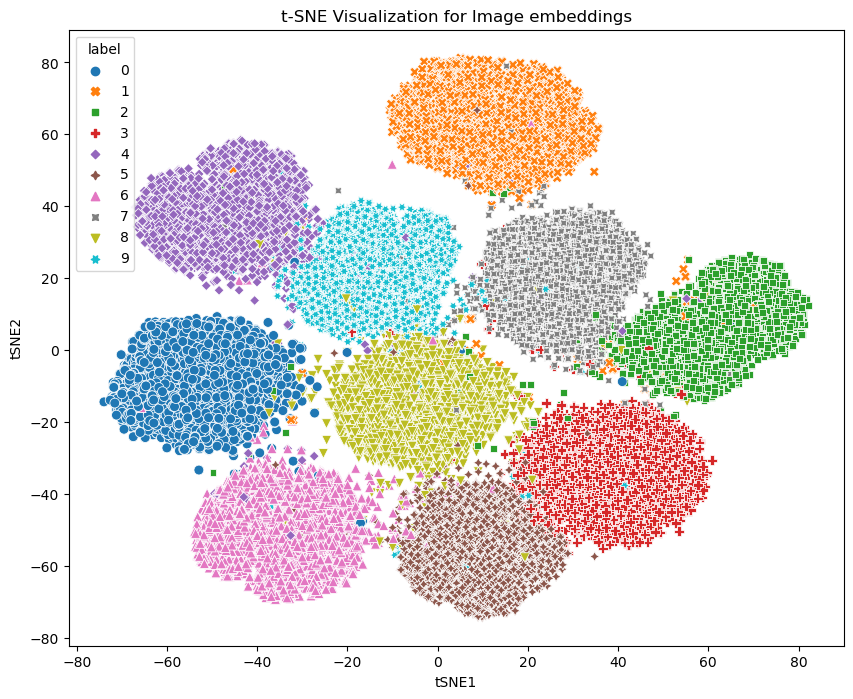

In [66]:
import seaborn as sns
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=10)
image_embd = tsne.fit_transform(image_embedding)

img_df = pd.DataFrame({'tSNE1': image_embd[:, 0], 'tSNE2': image_embd[:, 1], 'label': labels}) 

# Plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=img_df, x='tSNE1', y='tSNE2', hue='label', palette='tab10', style='label', s=50)
plt.title('t-SNE Visualization for Image embeddings')
plt.show()

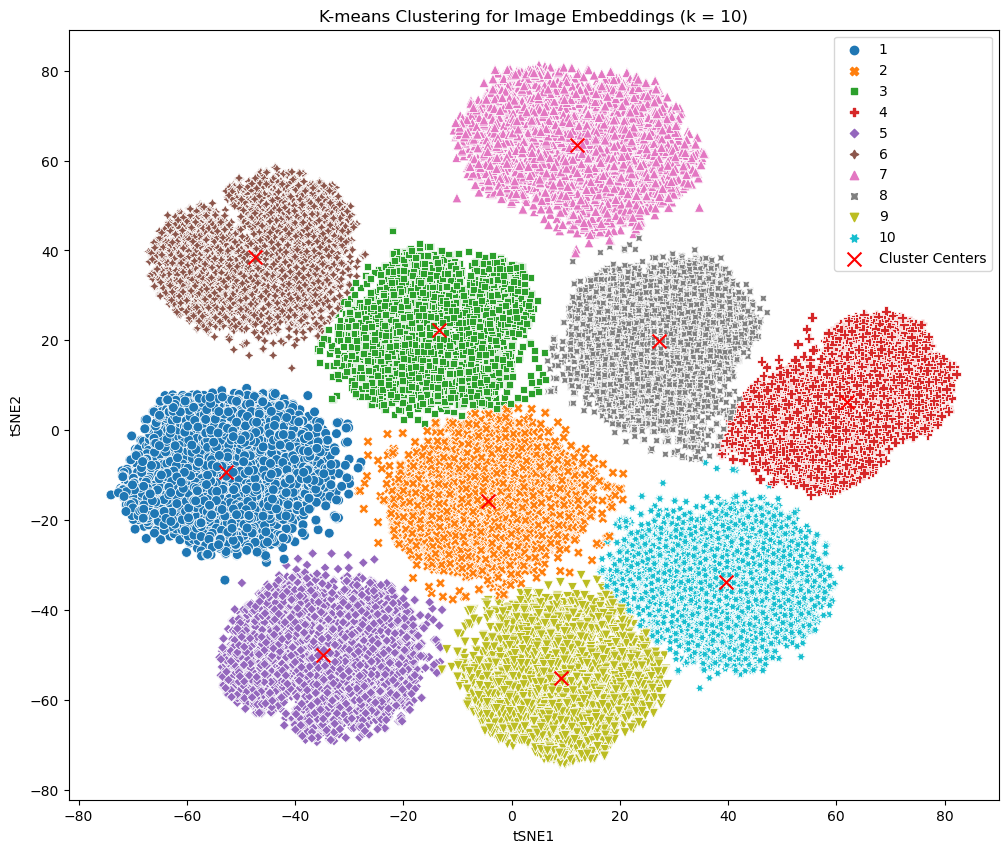

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=10)
kmeans.fit(image_embd)

img_df['cluster'] = kmeans.labels_ + 1
centers = kmeans.cluster_centers_

plt.figure(figsize=(12, 10))
sns.scatterplot(data=img_df, x='tSNE1', y='tSNE2', hue='cluster', palette='tab10', style='cluster', s=50)
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='x', label='Cluster Centers')
plt.title('K-means Clustering for Image Embeddings (k = 10)')
plt.legend()
plt.show()

In [228]:
img_crosstable = pd.crosstab(img_df['label'], img_df['cluster'])
img_crosstable

cluster    1     2     3     4     5     6     7     8     9     10
label                                                              
0        4664     9     2     6    20     1     2     0     2     3
1           5    19     2    46     3     6  5319    23     0     4
2          11    18     5  4615     3     4     8    52     0    21
3           5    14    12    22     0     1     0    25    83  4728
4           7     8    90     4    25  4512    12     5     0     0
5           5    38     2     1    19     0     2     2  4210    52
6          25    19     0     1  4652    13    10     0    44     2
7           0    13    24    33     0     9    23  4938     0     9
8          21  4540    27    14    10     8    12     6    27    24
9          14    29  4573     0     3    42     4    32    28    14

From the above plots, we will see a t-SNE plot and a K-means clustering plot for image embeddings, along with a cross table that indicates the assignment of labels to specific clusters for image embeddings. From the t-SNE plot for image embeddings we are able to identify different clusters corresponding to each label with good clarity. Some of the label data points are present in different label cluster but those datapoints are very less and hence we can differentiate between the different clusters based on the labels with most clarity. After applying k- means (k=10) we can see from the Figure that **k means is able to differentiate between the cluster and assigns almost a similar label to a specific cluster with higher precision. Later on it is justified from the image crosstable that in each cluster a specific type of label values are more as compared to other labels showing clear assignment. We see for label 0 most of the values are assigned to cluster 1, for label 1 most values are assigned to Cluster 7 and so on.**

## t-SNE and K means plot for audio embeddings

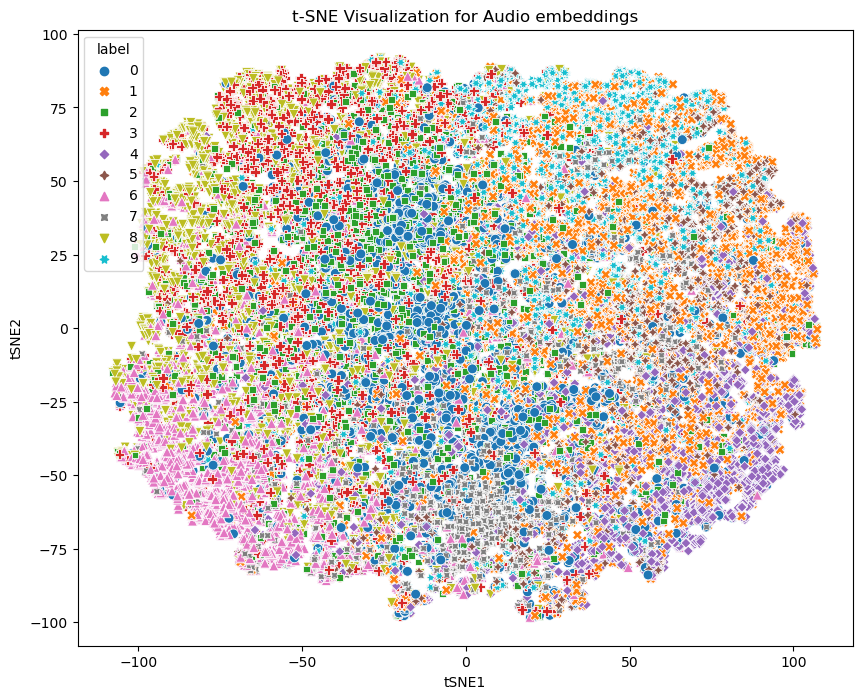

In [68]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=10)
audio_embd = tsne.fit_transform(audio_embedding)

aud_df = pd.DataFrame({'tSNE1': audio_embd[:, 0], 'tSNE2': audio_embd[:, 1], 'label': labels}) 

# Plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=aud_df, x='tSNE1', y='tSNE2', hue='label', palette='tab10', style='label', s=50)
plt.title('t-SNE Visualization for Audio embeddings')
plt.show()

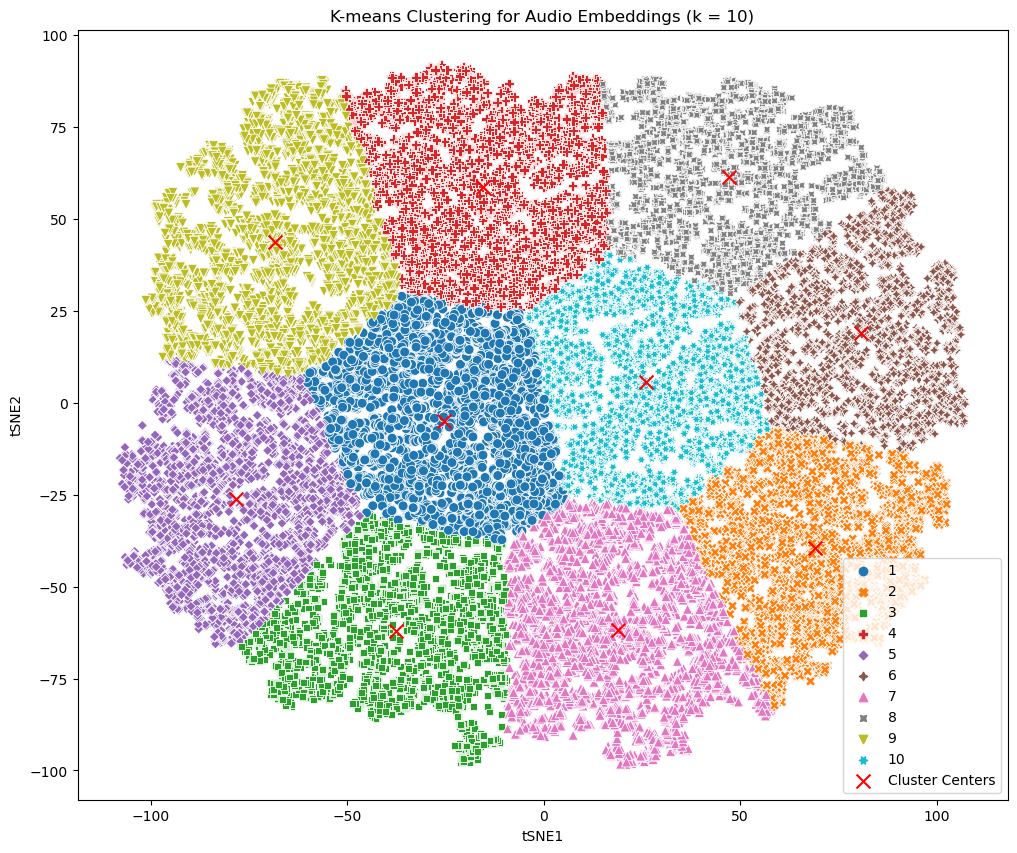

In [69]:
kmeans = KMeans(n_clusters=10, random_state=10)
kmeans.fit(audio_embd)

aud_df['cluster'] = kmeans.labels_ + 1

centers = kmeans.cluster_centers_

plt.figure(figsize=(12, 10))
sns.scatterplot(data=aud_df, x='tSNE1', y='tSNE2', hue='cluster', palette='tab10', style='cluster', s=50)
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='x', label='Cluster Centers')
plt.title('K-means Clustering for Audio Embeddings (k = 10)')
plt.legend()
plt.show()

In [229]:
aud_crosstable = pd.crosstab(aud_df['label'], aud_df['cluster'])
aud_crosstable

cluster    1     2     3     4     5     6     7     8     9    10
label                                                             
0        1405   280   409   848   169    89   800    39   211  459
1         175   867   126   326    28  1334   439  1151    19  962
2        1216    94   325  1227   391    51   243   100   684  406
3         842    20   267  1178   397    15   120    47  1842  162
4         197  2320   173   103    30   434   999    57     2  348
5          94   587   175   108    42  1412   465   726    18  704
6         212    23  1421    69  2422     7   157    26   316  113
7         313   294   906   134   199   398  1711   246    69  779
8         492    22   295   483  1008    10    79    30  2157  113
9         190   141   117   682    28   498   174  1957    67  885

From the above figure, we will see a t-SNE plot and a K-means clustering plot for audio embeddings, along with a cross table that indicates the assignment of labels to specific clusters for audio embeddigns. From the t-SNE plot for audio embeddings we are not able to identify different clusters corresponding to each label. The plot is mixed with different labels values and we are not able to identify between clusters. After applying k- means (k=10) we can see from the Figure that **k means is able to create clusters but is not able to assigns similar type of label to a particular cluster. Later on it is justified from the audio crosstable that in each cluster there are multiple datapoints present corresponding to each label. We can not classify which type of labels are present more in a particular cluster. We can see in Cluster 1, for 0 label and 2 label the values are almost similar and for rest all there are sigificant number of datapoints present so we can not classify cluster 1 based on a single label.**

**References-**

1. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
2. https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/
3. https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/
4. Class Discussion - CNN
5. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html